# **SOLRAD TUTORIAL 1 : Acquisition and processing of satellite data**

In this tutorial we shall acquire and process the necessary satellite data, that is required to perform 
later calculations in the computation of radiometric quantities. Specifically, we shall
request information from the Climate Data Store (CDS) for the following databases
of atmospheric quantities:

### [1] (OPTIONAL)
Copernicus Climate Change Service, Climate Data Store, (2020): 
Ozone monthly gridded data from 1970 to present derived from satellite observations.
Copernicus Climate Change Service (C3S) Climate Data Store (CDS). DOI: 10.24381/cds.4ebfe4eb 



### [2] (OPTIONAL)
Preusker, R., El Kassar, R. (2022): Monthly total column water vapour over 
land and ocean from 2002 to 2012 derived from satellite observation. Copernicus
Climate Change Service (C3S) Climate Data Store (CDS). DOI: 10.24381/cds.8e0e4724 


### [3] (REQUIRED)
Copernicus Climate Change Service, Climate Data Store, (2019): Aerosol
properties gridded data from 1995 to present derived from satellite observation. 
Copernicus Climate Change Service (C3S) Climate Data Store (CDS). DOI: 10.24381/cds.239d815c 

Databases [1] and [2] are strictly not required (as other methods exist for estimating the quantities they 
provide), though their use is recommended. the use of database in [3], however, is required.





## **THE CLIMATE DATA STORE**

"The Copernicus - Climate Data Store (CDS) is an online open and free service
that allows users to browse and access a wide range of climate datasets via a 
searchable catalogue. It also allows users to build their own applications,
maps and graphs."

1) CDS webpage at:
https://cds.climate.copernicus.eu/cdsapp#!/home

2) More info about its API, at:
https://cds.climate.copernicus.eu/api-how-to

3) Useful tutorial on how to use the API, at
https://youtu.be/cVtiVTSVdlo


**NOTE:**
As described by the links in 2. and 3., it is necessary to have a CDS 
account (and be currently logged in) account in order to be able to use
the API. Furtheremore, the user's key and the API website link should be 
stored in a place, recognisable by the system being used. We recommend 
watching the video tutorial linked in 3., as it is a good explanation on 
what steps need to be followed in order to work with cdsapi.

### IMPORTAION OF LIBRARIES

In [1]:
import os
import solrad
import numpy as np
import matplotlib.pyplot as plt
import solrad.atmosphere.ozone_column as oz
import solrad.atmosphere.water_column as wat
import solrad.atmosphere.aod_550nm as aod550

### DEFINITION DEFAULT PATH CONSTANTS

In [2]:
DATA_PATH = os.path.join(os.path.dirname(os.path.dirname(solrad.__path__[0])), "data")
OZONE_DATABASE_PATH = os.path.join(DATA_PATH, "ozone")
WATER_DATABASE_PATH = os.path.join(DATA_PATH, "water")
AOD_550NM_DATABASE_PATH = os.path.join(DATA_PATH, "aod_550nm")

### DEFINITION DEFAULT PATH VARIABLES

Define the directory where the data files for each atmospheric quantity will be stored; this must be an empty folder somewhere
in your system. You must replace the value of the paths as they appear below to the ones you will actually use for your system or set them to None.
We recommend that you don't leave the default paths as they are (these are intended for developers). Finally, setting a path to None will mean that
the files for that quantity won't neither be downloaded nor processed.

In [3]:
# (OPTIONAL)
ozone_database_path = OZONE_DATABASE_PATH

# (OPTIONAL)
water_database_path = WATER_DATABASE_PATH

# (REQUIRED)
aod_550nm_database_path = AOD_550NM_DATABASE_PATH

### RETRIEVE DATA

We retrieve the database files for each solicited atmospheric quantity.
Read the documentation to learn more about the functions used here.
Read the documentation of each database to learn more about the years that are available to retrieve.

In [4]:

if ozone_database_path is not None:
    years = ["2019", "2020", "2021"]
    oz.get_CDS_ozone_column_data(path = ozone_database_path,
                                 year = years,
                                 month = None,
                                 file_format = "numpy")
    
if water_database_path is not None:
    years = ["2009", "2010", "2011"]
    wat.get_CDS_water_column_data(path = water_database_path,
                                  year = years,
                                  month = None,
                                  file_format = "numpy")
    
if aod_550nm_database_path is not None:
    years = ["2020", "2021", "2022"]
    aod550.get_CDS_aod_550nm_data(path = aod_550nm_database_path,
                                  year = years,
                                  month = None,
                                  file_format = "numpy")

2023-12-31 11:22:11,357 INFO Welcome to the CDS
2023-12-31 11:22:11,357 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/satellite-ozone-v1
2023-12-31 11:22:11,858 INFO Request is queued
2023-12-31 11:22:13,146 INFO Request is running
2023-12-31 11:22:34,644 INFO Request is completed
2023-12-31 11:22:34,648 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data9/dataset-satellite-ozone-v1-b82d25d8-7c47-4599-86da-1d6127cfb28c.zip to C:\Users\PC-LENOVO\Desktop\solrad-project\data\ozone.zip (3.4M)
2023-12-31 11:22:45,236 INFO Download rate 331.8K/s 
2023-12-31 11:22:46,415 INFO Welcome to the CDS
2023-12-31 11:22:46,424 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/satellite-total-column-water-vapour-land-ocean
2023-12-31 11:22:46,814 INFO Request is queued
2023-12-31 11:22:48,205 INFO Request is running
2023-12-31 11:23:38,908 INFO Request is completed
2023-12-31 11:23:38,910 INFO Downloading

### FILL DATA NaNs

We interpolate and fill the NaNs in the data for all required files.
(Only water column and aod_550nm data require this treatment). This step
may actually take quite a while. Read the documentation to learn more about these functions.

In [5]:
if water_database_path is not None:
    wat.fill_CDS_water_column_data_nans(path = water_database_path, 
                                        iterations = 20000,
                                        show_progress = True,
                                        replace = True)
    
if aod_550nm_database_path is not None:
    aod550.fill_CDS_aod_550nm_data_nans(path = aod_550nm_database_path, 
                                        iterations = 20000,
                                        show_progress = True,
                                        replace = True)

Processed files: 1
Processed files: 2
Processed files: 3
Processed files: 4
Processed files: 5
Processed files: 6
Processed files: 7
Processed files: 8
Processed files: 9
Processed files: 10
Processed files: 11
Processed files: 12
Processed files: 13
Processed files: 14
Processed files: 15
Processed files: 16
Processed files: 17
Processed files: 18
Processed files: 19
Processed files: 20
Processed files: 21
Processed files: 22
Processed files: 23
Processed files: 24
Processed files: 25
Processed files: 26
Processed files: 27
Processed files: 28
Processed files: 29
Processed files: 30
Processed files: 31
Processed files: 32
Processed files: 33
Processed files: 34
Processed files: 35
Processed files: 36
Processed files: 1
Processed files: 2
Processed files: 3
Processed files: 4
Processed files: 5
Processed files: 6
Processed files: 7
Processed files: 8
Processed files: 9
Processed files: 10
Processed files: 11
Processed files: 12
Processed files: 13
Processed files: 14
Processed files: 1

### PLOT PROCESSED DATA AND RAW DATA (IF AVAILABLE)

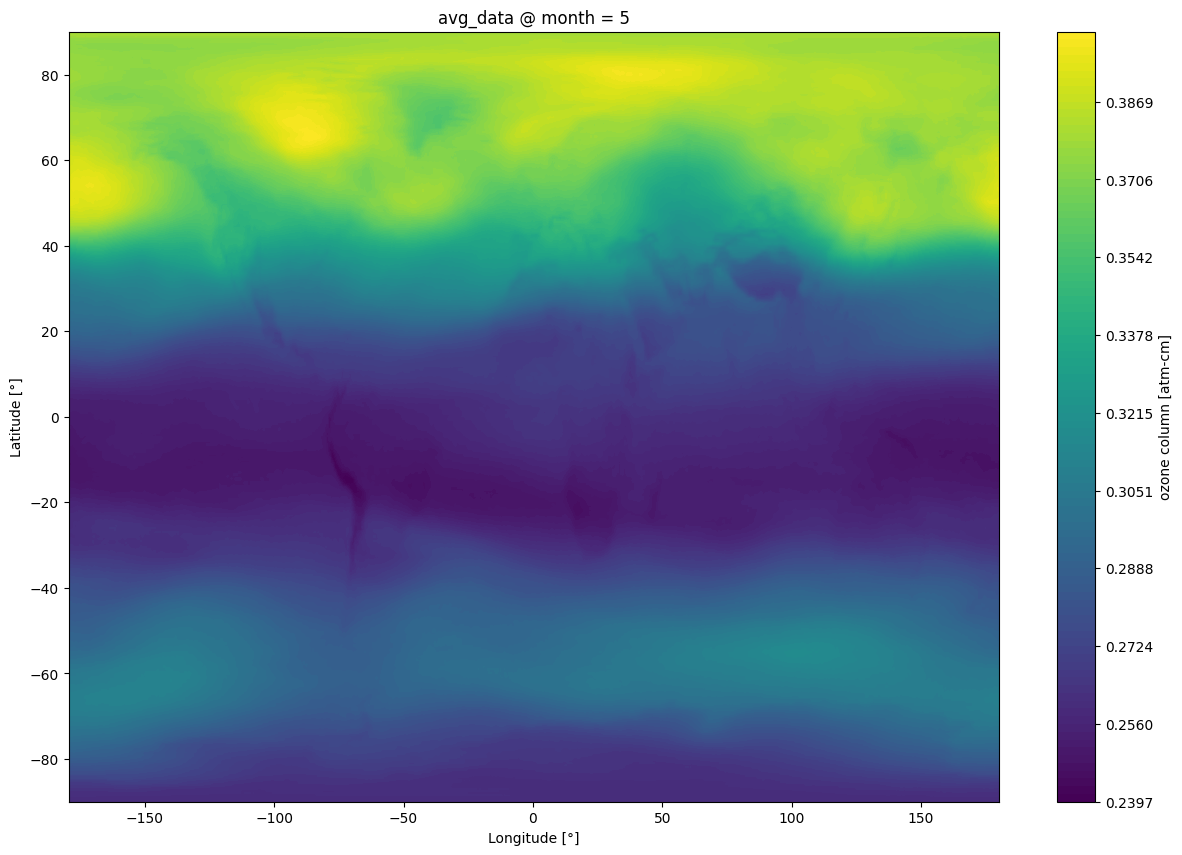

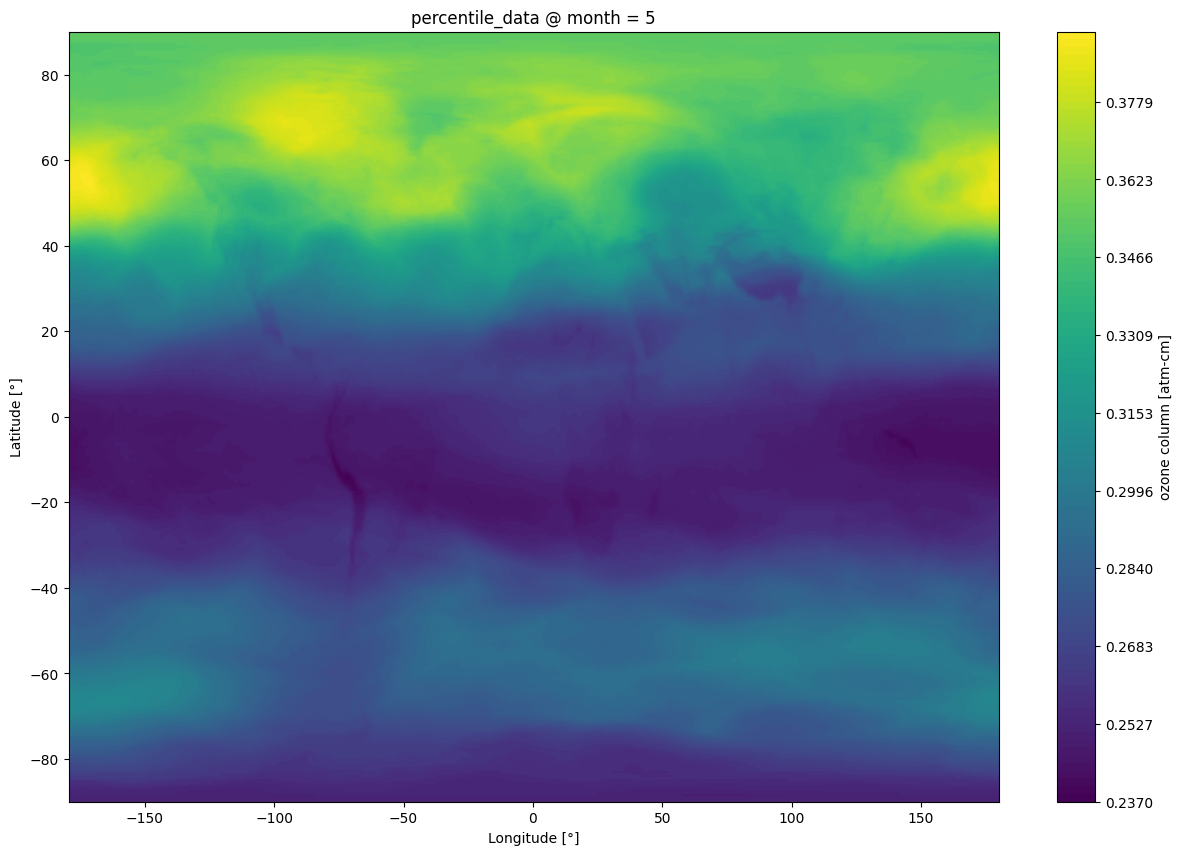

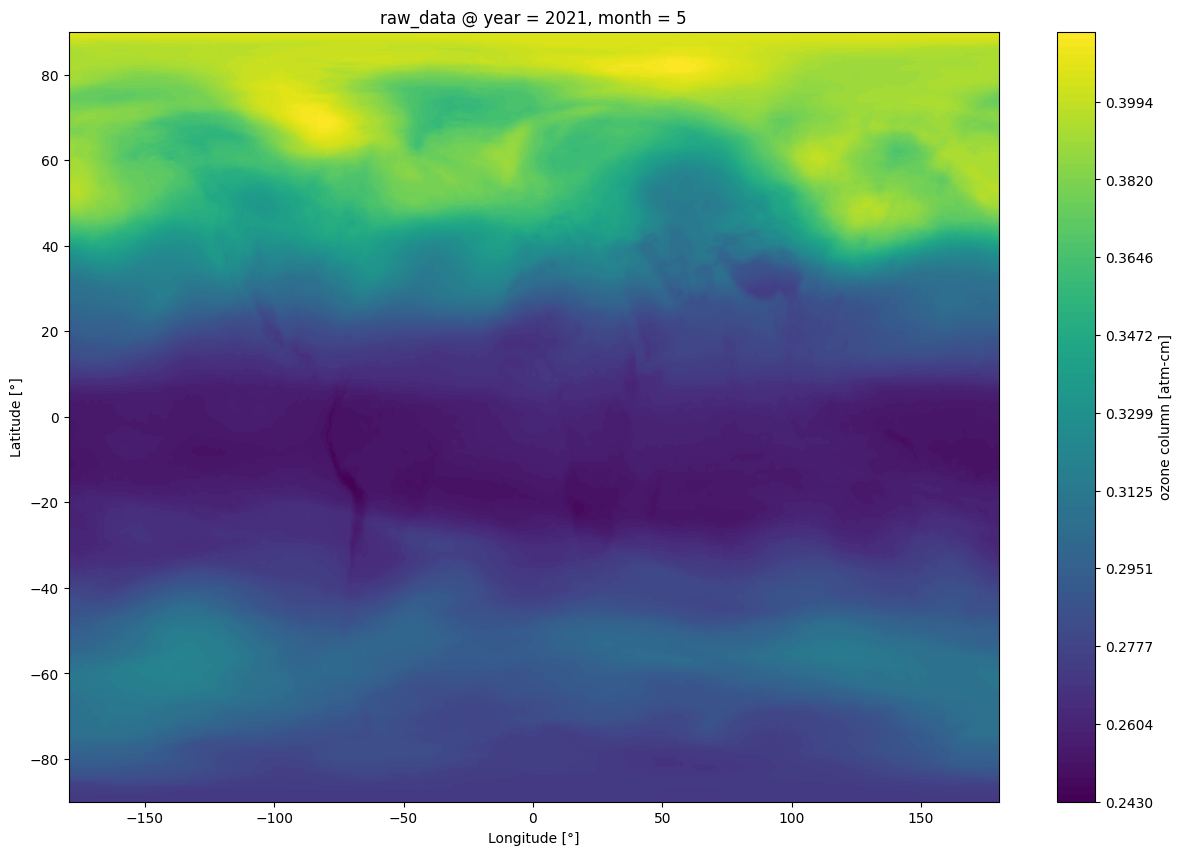

C:\Users\PC-LENOVO\Desktop\solrad-project\src\solrad\atmosphere\water_column.py:499: UserWarning: Local water column database is empty of filled_NaNs.npy files. No column water filled_NaNs.npy files to retrieve were found.
  warnings.warn(msg)
C:\Users\PC-LENOVO\Desktop\solrad-project\src\solrad\atmosphere\water_column.py:536: UserWarning: Not all raw.npy files have an associated filled_NaNs.npy file in the database, and viceversa. Therefore, not all information will be available for all files.
  warnings.warn(msg)


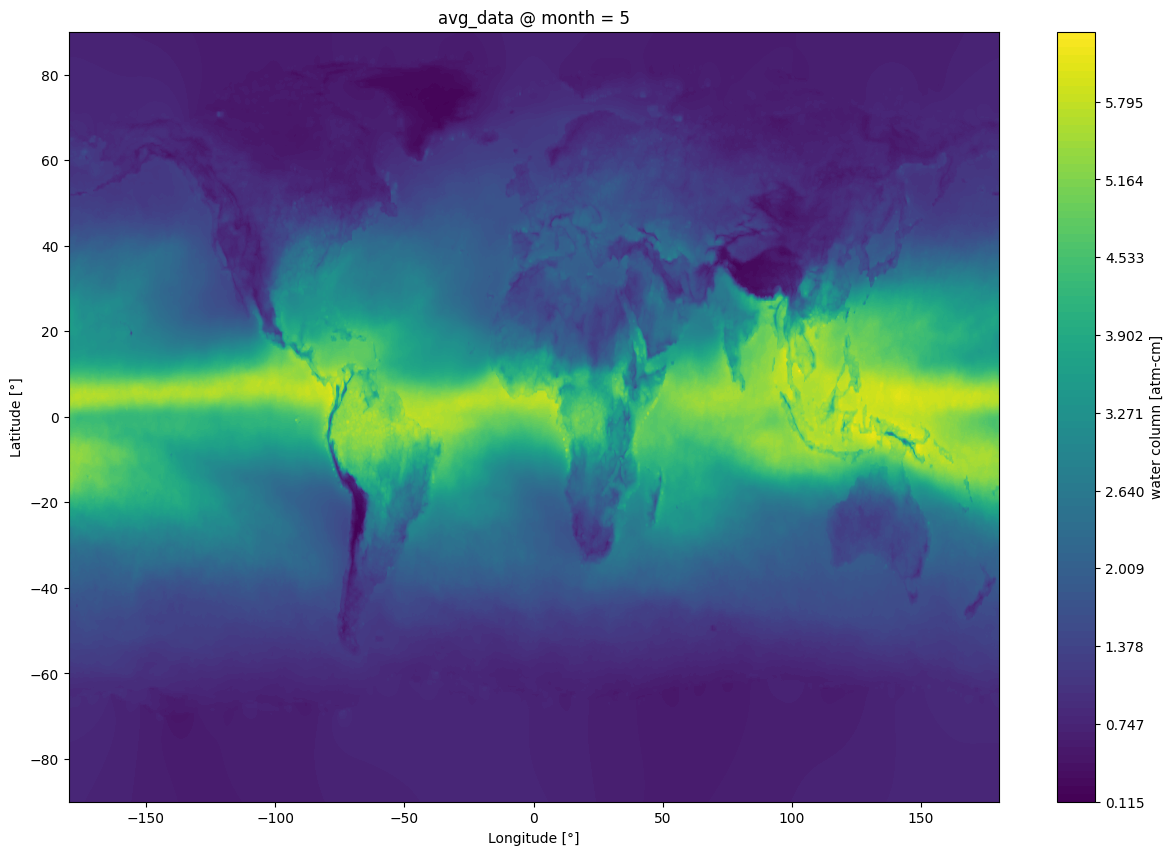

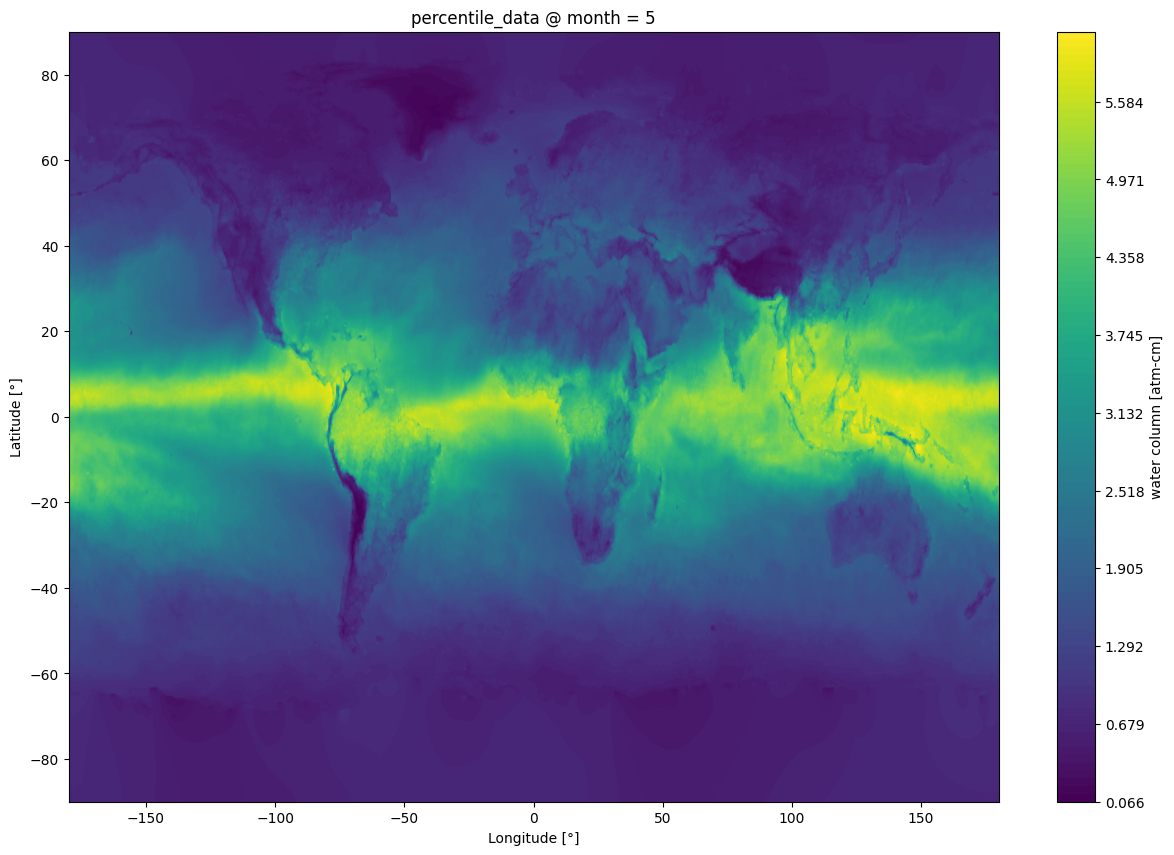

C:\Users\PC-LENOVO\Desktop\solrad-project\src\solrad\atmosphere\aod_550nm.py:490: UserWarning: Local aod_550nm database is empty of filled_NaNs.npy files. No column water filled_NaNs.npy files to retrieve were found.
  warnings.warn(msg)
C:\Users\PC-LENOVO\Desktop\solrad-project\src\solrad\atmosphere\aod_550nm.py:527: UserWarning: Not all raw.npy files have an associated filled_NaNs.npy file in the database, and viceversa. Therefore, not all information will be available for all files.
  warnings.warn(msg)


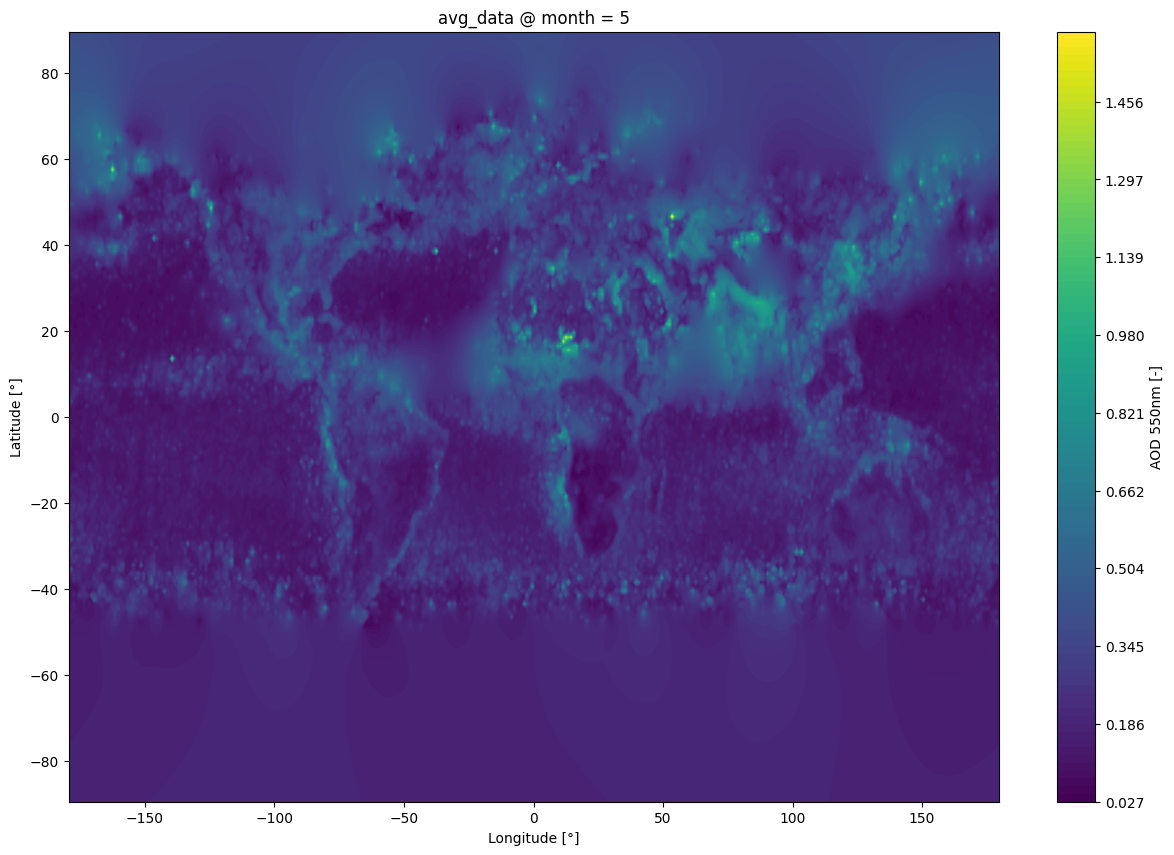

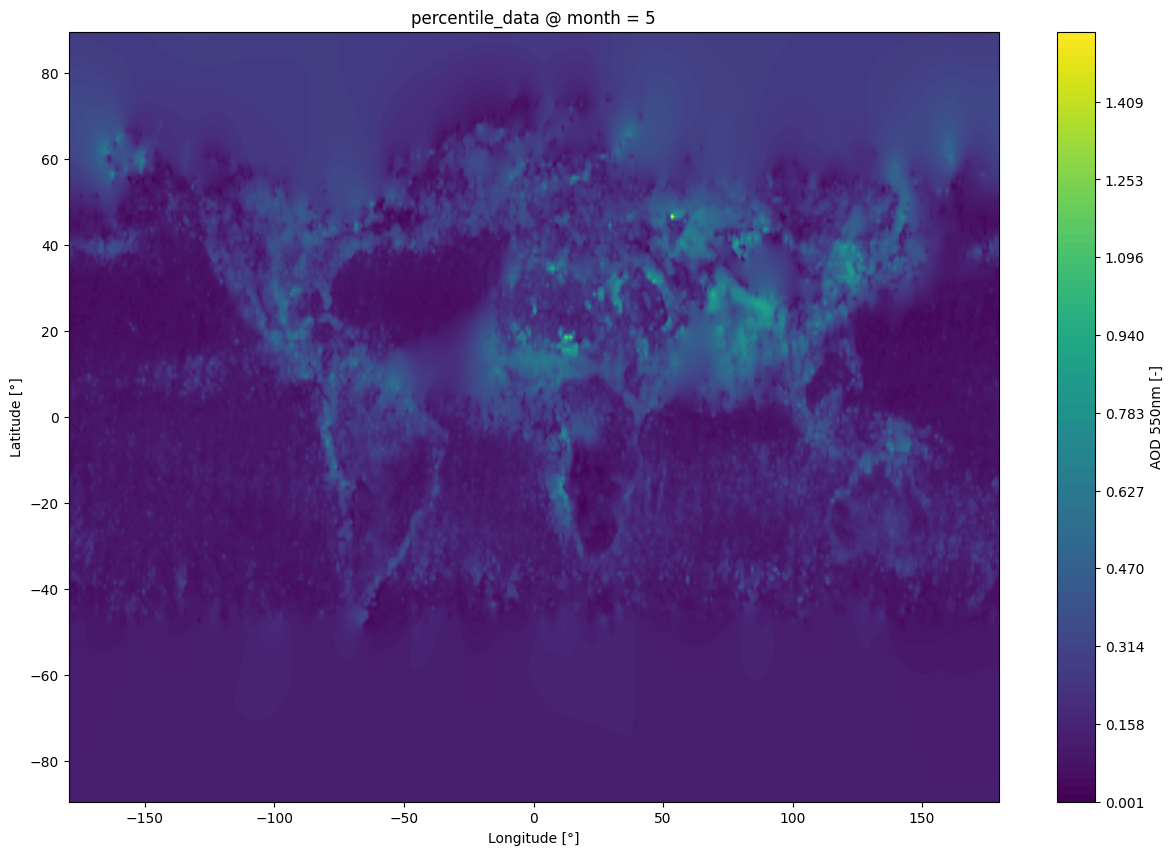

In [6]:
for var in ["ozone", "water", "aod550"]:

    if var == "ozone":
        if ozone_database_path is None:
            continue
        else:
            res = oz.process_CDS_ozone_column_data(ozone_database_path, percentile = 0.5, interp_method = "linear")
            year, month = 2021, 5
            avg_data = res["avg_data"][(month)]
            percentile_data = res["percentile_data"][(month)]
            lon, lat = res["longitude"], res["latitude"]
            Lon, Lat = np.meshgrid(lon, lat)
            label = 'ozone column [atm-cm]'

    elif var == "water":
        if water_database_path is None:
            continue
        else:
            res = wat.process_CDS_water_column_data(water_database_path, percentile = 0.5, interp_method = "linear")
            year, month = 2011, 5
            avg_data = res["avg_data"][(month)]
            percentile_data = res["percentile_data"][(month)]
            lon, lat = res["longitude"], res["latitude"]
            Lon, Lat = np.meshgrid(lon, lat)   
            label = 'water column [atm-cm]'         

    elif var == "aod550":
        if aod_550nm_database_path is None:
            continue
        else:
            res = aod550.process_CDS_aod_550nm_data(aod_550nm_database_path, percentile = 0.5, interp_method = "linear")
            year, month = 2022, 5
            avg_data = res["avg_data"][(month)]
            percentile_data = res["percentile_data"][(month)]
            lon, lat = res["longitude"], res["latitude"]
            Lon, Lat = np.meshgrid(lon, lat) 
            label = 'AOD 550nm [-]'  


    fig = plt.figure(figsize=(15,10))
    plt.contourf(Lon, Lat, avg_data, levels = np.linspace(avg_data.min(),avg_data.max(), 100))
    cbar = plt.colorbar()
    plt.title(f"avg_data @ month = {month}")
    plt.ylabel("Latitude [°]")
    plt.xlabel("Longitude [°]")
    cbar.set_label(label)
    plt.show()

    fig = plt.figure(figsize=(15,10))
    plt.contourf(Lon, Lat, percentile_data, levels = np.linspace(percentile_data.min(),percentile_data.max(), 100))
    cbar = plt.colorbar()
    plt.title(f"percentile_data @ month = {month}")
    plt.ylabel("Latitude [°]")
    plt.xlabel("Longitude [°]")
    cbar.set_label(label)
    plt.show()

    try:
        raw_data = res["raw_data"][(year, month)]
        fig = plt.figure(figsize=(15,10))
        plt.contourf(Lon, Lat, raw_data, levels = np.linspace(np.nanmin(raw_data), np.nanmax(raw_data), 100) )
        cbar = plt.colorbar()
        plt.title(f"raw_data @ year = {year}, month = {month}")
        plt.ylabel("Latitude [°]")
        plt.xlabel("Longitude [°]")
        cbar.set_label(label)
        plt.show()
    except KeyError:
        pass